Лабораторная работа №0.

Недосеков И.Д., группа М8О-306Б-19

## Цель
В данной лабораторной работе, вы выступаете в роли предприимчивого начинающего стартапера в области машинного обучения. Вы заинтересовались этим направлением и хотите предложить миру что-то новое и при этом неплохо заработать. От вас требуется определить задачу которую вы хотите решить и найти под нее соответствующие данные. Так как вы не очень богаты, вам предстоит руками проанализировать данные, визуализировать зависимости, построить новые признаки и сказать хватит ли вам этих данных, и если не хватит найти еще. Вы готовитесь представить отчет ваши партнерам и спонсорам, от которых зависит дальнейшая ваша судьба. Поэтому тщательно работайте:) И главное, день промедления и вас опередит ваш конкурент, да и сплагиаченная работа отразится на репутации

## Датасет

[Body signal of smoking](https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking)

- ID : index
- gender
- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- oral : Oral Examination status
- dental caries
- tartar : tartar status
- smoking

In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [89]:
dataset = pd.read_csv('./smoking.csv')
dataset.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [90]:
dataset.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

Сразу можно выкинуть колонку ID

In [91]:
dataset = dataset.drop(['ID'], axis=1)

Посмотрим какие типы имеют колонки

In [92]:
dataset.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

Начнем подготавливать данные

In [93]:
dataset.columns[dataset.isna().any()].tolist()

[]

Хорошо что нанов нет

Переведем категориальные признаки в коды

In [94]:
dataset['gender'].describe()

count     55692
unique        2
top           M
freq      35401
Name: gender, dtype: object

In [95]:
dataset['gender'] = dataset['gender'].astype('category')
dataset['gender'] = dataset['gender'].cat.codes

In [96]:
dataset.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [97]:
dataset['oral'].describe()

count     55692
unique        1
top           Y
freq      55692
Name: oral, dtype: object

Так как в колонке всегда одно значение, то его можно выкинуть

In [98]:
dataset = dataset.drop(['oral'], axis=1)

In [99]:
dataset['tartar'].describe()

count     55692
unique        2
top           Y
freq      30940
Name: tartar, dtype: object

In [100]:
dataset['tartar'] = dataset['tartar'].astype('category')
dataset['tartar'] = dataset['tartar'].cat.codes

In [101]:
dataset.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


In [102]:
numeric_columns = [
    'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
    'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
    'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
    'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
    'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries'
]
category_columns = ['gender', 'tartar']
target_column = ['smoking']

In [103]:

dataset[numeric_columns].describe(include='all')

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


Во многих колонках присутсвует шум, давайте почистим по 99 квантилю

In [104]:
for column in numeric_columns:
    if abs(dataset[column].quantile(0.99) - dataset[column].max()) > dataset[column].mean() :
        print(f'Dropping {column=} {(dataset[column] > dataset[column].quantile(0.99)).sum()} lines')
        dataset = dataset[dataset[column] <= dataset[column].quantile(0.99)]


Dropping column='eyesight(left)' 516 lines
Dropping column='eyesight(right)' 296 lines
Dropping column='fasting blood sugar' 539 lines
Dropping column='triglyceride' 526 lines
Dropping column='HDL' 519 lines
Dropping column='LDL' 518 lines
Dropping column='Urine protein' 299 lines
Dropping column='serum creatinine' 432 lines
Dropping column='AST' 512 lines
Dropping column='ALT' 504 lines
Dropping column='Gtp' 504 lines


In [105]:
dataset.describe()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
count,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000,50527.000000
mean,0.622578,44.124923,164.512538,65.458270,81.707875,0.990686,0.985812,1.025135,1.025412,121.135927,75.745047,97.540384,195.339680,122.072535,57.106596,113.997328,14.577117,1.062086,0.877038,24.361332,24.346646,34.127021,0.210897,0.552991,0.355374
std,0.484747,12.046823,9.241505,12.572683,9.118877,0.314884,0.313419,0.156537,0.157375,13.526506,9.579187,14.694011,34.197255,65.791490,13.571226,31.422782,1.561169,0.297645,0.182858,8.201057,13.930147,28.026458,0.407950,0.497189,0.478631
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,72.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,155.000000,55.000000,75.200000,0.800000,0.800000,1.000000,1.000000,111.000000,70.000000,89.000000,172.000000,73.000000,47.000000,92.000000,13.500000,1.000000,0.700000,19.000000,15.000000,17.000000,0.000000,0.000000,0.000000
50%,1.000000,40.000000,165.000000,65.000000,81.500000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,95.000000,194.000000,105.000000,56.000000,113.000000,14.700000,1.000000,0.900000,23.000000,20.000000,24.000000,0.000000,1.000000,0.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,81.000000,103.000000,218.000000,155.000000,66.000000,135.000000,15.700000,1.000000,1.000000,28.000000,29.000000,40.000000,0.000000,1.000000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,1.500000,1.500000,2.000000,2.000000,240.000000,146.000000,188.000000,351.000000,360.000000,100.000000,203.000000,21.100000,3.000000,1.300000,77.000000,93.000000,198.000000,1.000000,1.000000,1.000000


Кажется избавились от основных шумов

Теперь проверим признаки на взаимозаменяемость

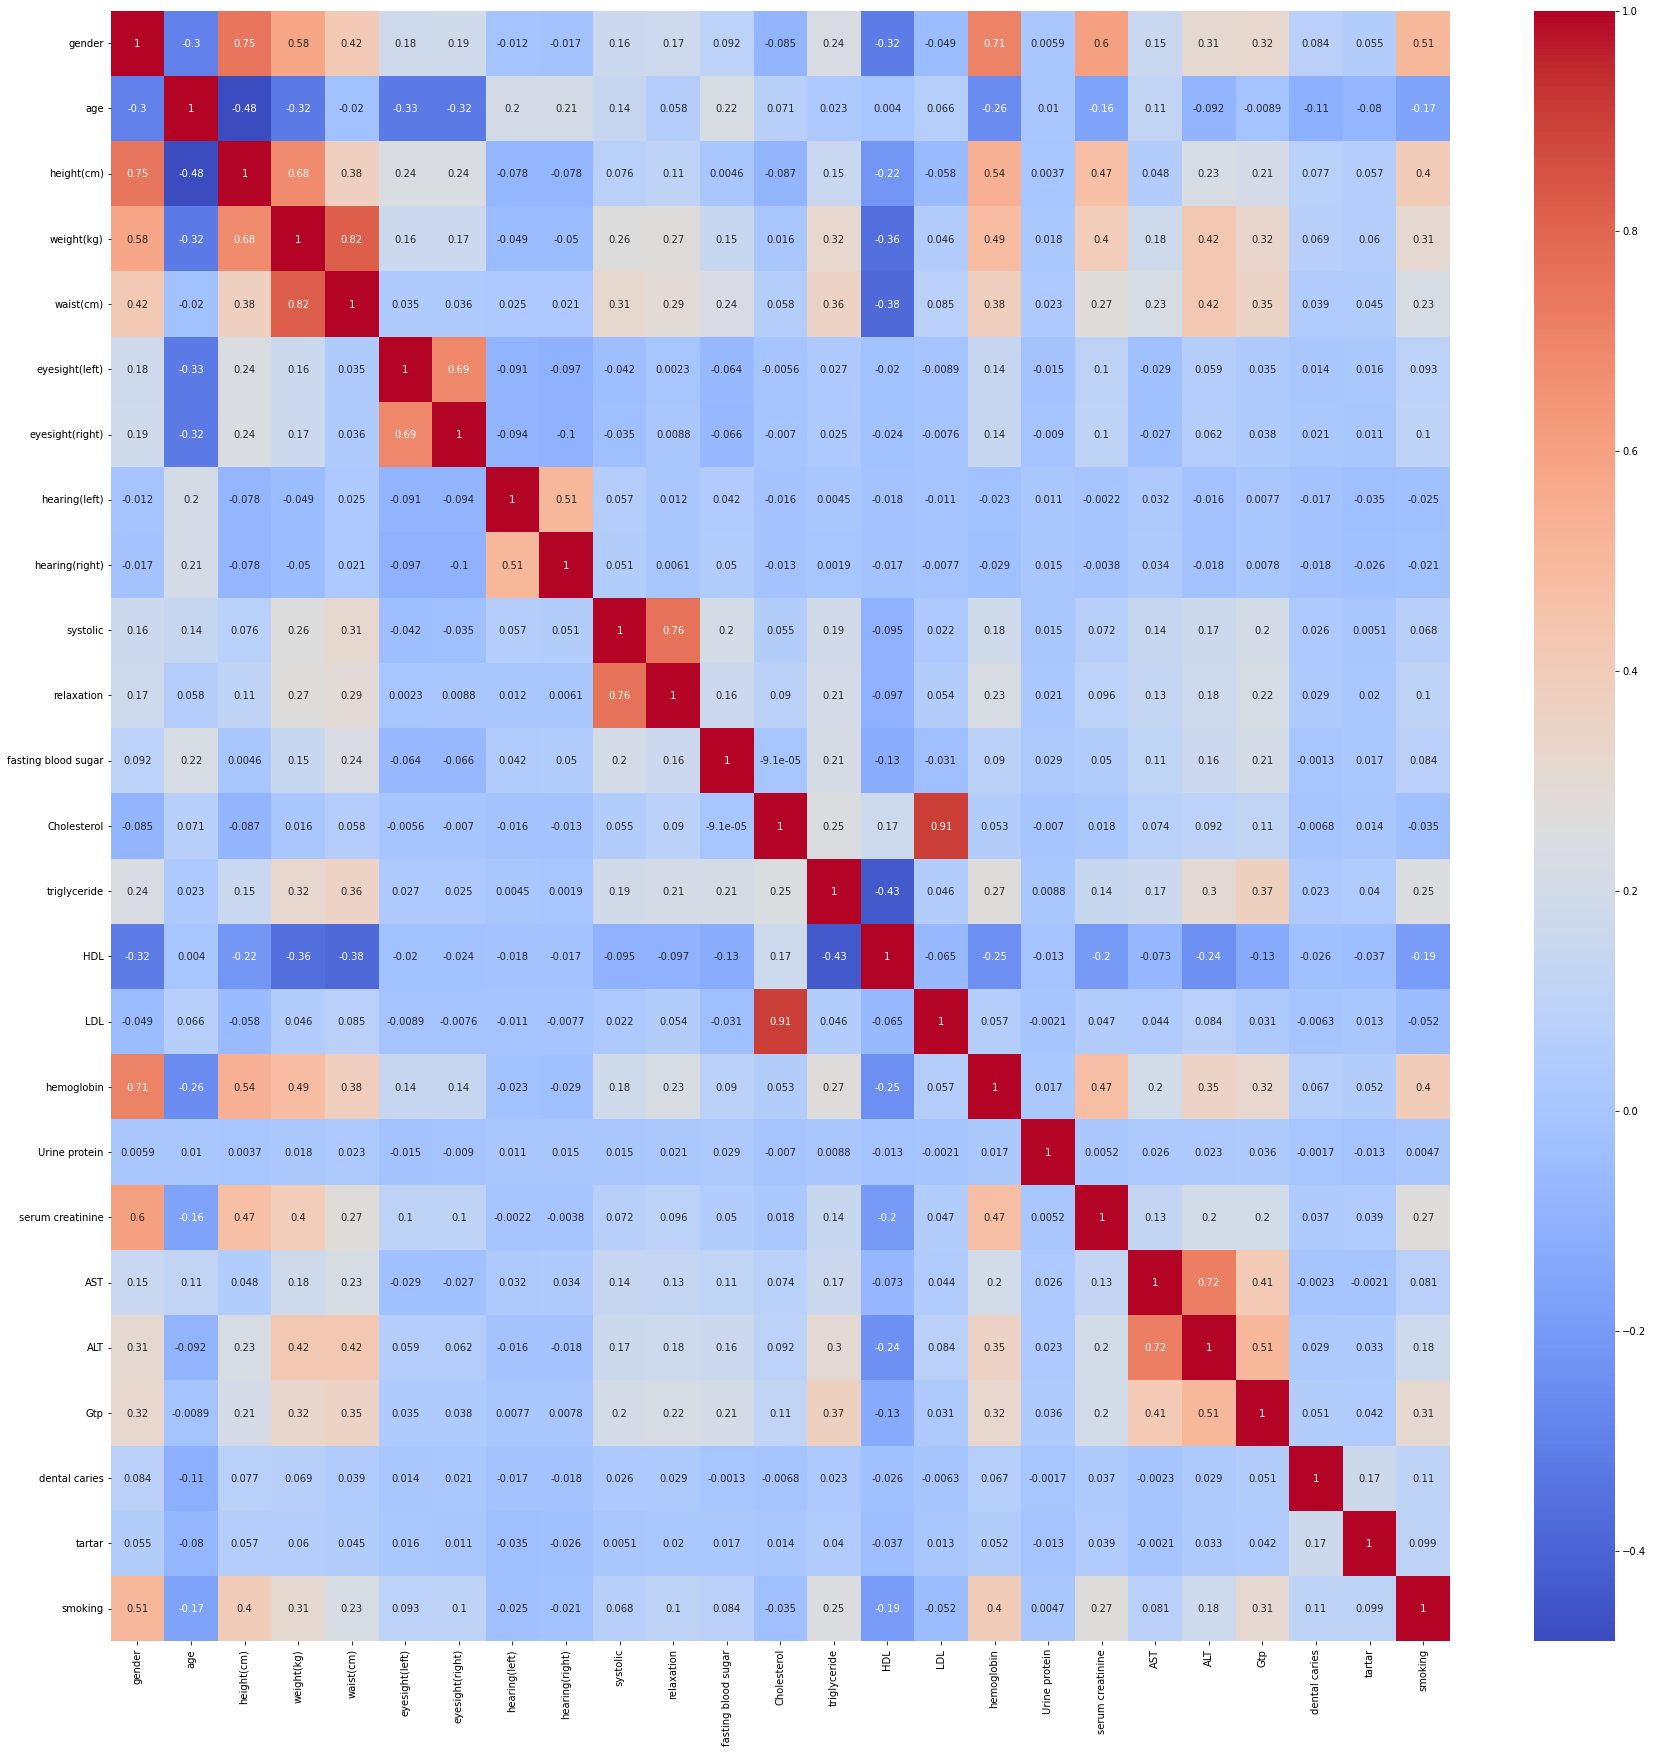

In [106]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(dataset.corr(), cmap="coolwarm", annot=True)
plt.show()

HDl и LDL это компоненты холестерина, так как они сильно зависимы, то удалим холестерин. Так де удалим объем талии, так как это сильно зависит от веса.

In [107]:
dataset = dataset.drop(['waist(cm)', 'Cholesterol'], axis=1)

In [108]:
dataset.head()

,gender,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,1.2,1.0,1.0,1.0,114.0,73.0,94.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,0.8,0.6,1.0,1.0,119.0,70.0,130.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,0.8,0.8,1.0,1.0,138.0,86.0,89.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
4,0,40,155,60,1.0,1.0,1.0,1.0,120.0,74.0,80.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
5,1,30,180,75,1.2,1.2,1.0,1.0,128.0,76.0,95.0,199.0,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,0,1,0


Проверим сбалансированность целевых классов

In [112]:
(dataset['smoking'] == 1).sum()

17956

In [111]:
(dataset['smoking'] == 0).sum()

32571

Кажется Целевые классы не совсем сбалансированные.

Теперь данные готовы к обучающим моделям